# ML-6. Бустинг. Стекинг  
## Юнит 6. Основные алгоритмы машинного обучения. Часть II
### Skillfactory: DST-10
---

## Пример, показывающий зависимость качества леса от глубины деревьев в нем

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

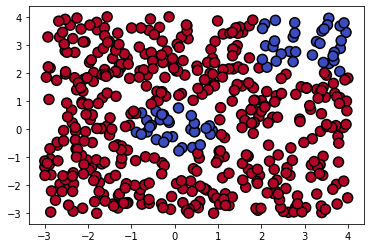

In [5]:
RANDOM_SEED = 139

def get_labels(data):
    labels = []
    for idx, item in enumerate(data):
        if item[0]**2 + item[1]**2 < 1:
            labels.append(0)
        elif item[0] > 2 and item[1] > 2:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(labels)

N = 500
train_data = 7 * np.random.random_sample((N,2)) - np.array([3,3])

train_labels = get_labels(train_data)

# Let’s write an auxiliary function that will return grid 
# for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), 
                       np.arange(y_min, y_max, 0.01))

shallow_rf = RandomForestClassifier(n_estimators=5, max_depth=3, n_jobs=-1, 
                                    random_state=RANDOM_SEED)
deep_rf = RandomForestClassifier(n_estimators=5, max_depth=6, n_jobs=-1, 
                                 random_state=RANDOM_SEED)

# training the tree
shallow_rf.fit(train_data, train_labels)
deep_rf.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted_shallow = shallow_rf.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
predicted_deep = deep_rf.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)

plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

Text(0.5, 1.0, 'Deep Random Forest')

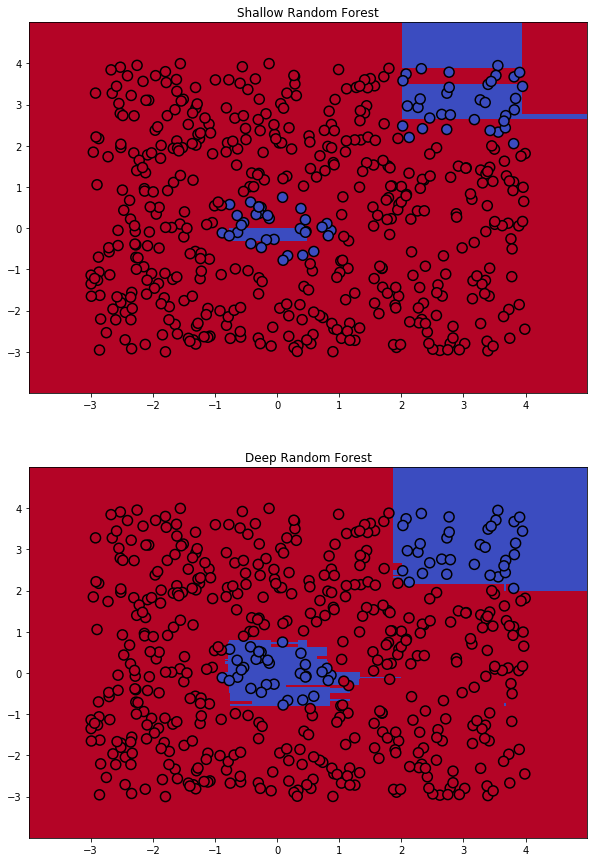

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(10,15))

ax[0].pcolormesh(xx, yy, predicted_shallow, cmap='coolwarm')
ax[0].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[0].set_title('Shallow Random Forest')

ax[1].pcolormesh(xx, yy, predicted_deep, cmap='coolwarm')
ax[1].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[1].set_title('Deep Random Forest')

### Задача 6.4.1


Пример использования бустинга. будем прогнозировать, является ли письмо спамом.

Из столбца yesno сделайте столбец spam, где 1 соответствует значению y (является спамом), а 0 – n (не является спамом). Удалите первый столбец (с индексом) и столбец "yesno".

У Вас остается шесть столбцов-признаков и один столбец spam, который является нашей целевой переменной. Разделим их на x и у.

Теперь мы хотим создать новые признаки путем попарного перемножения уже имеющихся друг на друга. Сколько получится признаков после преобразования (включая те шесть, которые были в исходных данных)?

---

In [1]:
import pandas as pd

In [2]:
# Выкачаем набор данных
df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/DAAG/spam7.csv')

In [3]:
df.sample(10)

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno
4213,4214,116,0.000,0.062,0.00,0.00,0.36,n
389,390,1834,0.101,0.356,0.08,1.10,0.08,y
4452,4453,45,0.000,0.232,0.00,0.00,0.00,n
2562,2563,36,0.000,0.000,0.00,0.00,0.00,n
2880,2881,6,0.000,0.000,0.00,0.00,0.00,n
1305,1306,215,0.000,0.647,0.00,0.00,0.22,y
749,750,224,0.000,0.126,0.00,0.00,0.68,y
1726,1727,26,0.000,0.110,0.00,0.00,0.70,y
3903,3904,79,0.000,0.000,0.00,0.00,0.00,n
582,583,542,0.030,0.242,0.09,0.36,0.09,y


In [4]:
# Из столбца yesno сделаем столбец spam:
#     1 - соответствует значению y (является спамом), 
#     0 – соответствует значению n (не является спамом).
df['spam'] = df['yesno'].map({'y': 1, 'n': 0})
# df['spam'] = df.yesno.apply(lambda x: 1 if x=='y' else 0)   # через lambda

In [5]:
df.sample(10)

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno,spam
4235,4236,28,0.000,0.000,0.00,0.00,0.00,n,0
3287,3288,963,0.016,0.000,0.00,0.00,0.05,n,0
459,460,477,0.000,0.203,0.00,0.00,0.00,y,1
3426,3427,1356,0.016,0.028,0.00,0.00,0.07,n,0
681,682,67,0.000,0.061,0.00,0.00,0.43,y,1
4319,4320,7,0.000,0.000,9.75,0.00,0.00,n,0
1061,1062,261,0.000,0.198,0.00,0.40,0.00,y,1
1743,1744,41,0.271,0.542,0.00,1.44,0.00,y,1
529,530,2220,0.500,0.456,0.60,0.37,0.50,y,1
2131,2132,120,0.000,0.044,0.00,0.00,0.60,n,0


In [6]:
# Удалим первый столбец (с индексом) и столбец "yesno".
df.drop(['Unnamed: 0', 'yesno'], axis=1, inplace=True)

In [7]:
df.sample(10)

,crl.tot,dollar,bang,money,n000,make,spam
273,66,0.000,0.000,0.0,0.0,0.0,1
2738,194,0.037,0.000,0.0,0.0,0.0,0
2266,35,0.000,0.331,0.0,0.0,0.0,0
3396,5,0.000,0.000,0.0,0.0,0.0,0
997,445,0.000,0.199,0.0,0.0,0.0,1
571,81,0.189,0.189,0.0,0.0,0.0,1
4340,18,0.000,0.766,0.0,0.0,0.0,0
2997,144,0.000,0.000,0.0,0.0,0.0,0
4401,11,0.000,0.000,0.0,0.0,0.0,0
1012,95,0.000,0.178,0.0,0.0,0.0,1


In [8]:
# Разделим DataFrame их на x и у
X = df.iloc[:, :-1]
y = df['spam']

In [9]:
# создать новые признаки путем попарного перемножения уже
# имеющихся друг на друга. Сколько получится признаков после преобразования
# (включая те шесть, которые были в исходных данных)?

X_copy = df.iloc[:, :-1]

# Способ 1
columns = X.columns
for col in columns:
    for col1 in columns:
        if col != col1 and col+'_'+col1 not in X.columns and col1 +'_'+col not in X.columns:
            X[col+'_'+col1] = X[col] * X[col1]

In [10]:
print(f'После преобразования получится {X.shape[1]} признаков')

После преобразования получится 21 признаков


In [11]:
X.head(4)

,crl.tot,dollar,bang,money,n000,make,crl.tot_dollar,crl.tot_bang,crl.tot_money,crl.tot_n000,...,dollar_bang,dollar_money,dollar_n000,dollar_make,bang_money,bang_n000,bang_make,money_n000,money_make,n000_make
0,278,0.000,0.778,0.00,0.00,0.00,0.000,216.284,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
1,1028,0.180,0.372,0.43,0.43,0.21,185.040,382.416,442.04,442.04,...,0.066960,0.07740,0.07740,0.03780,0.15996,0.15996,0.07812,0.1849,0.0903,0.0903
2,2259,0.184,0.276,0.06,1.16,0.06,415.656,623.484,135.54,2620.44,...,0.050784,0.01104,0.21344,0.01104,0.01656,0.32016,0.01656,0.0696,0.0036,0.0696
3,191,0.000,0.137,0.00,0.00,0.00,0.000,26.167,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000


In [12]:
# Способ 2
# создадим новые признаки с использованием PolynomialFeatures 
# из sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2, include_bias=False, interaction_only = True)
poly_df = pf.fit_transform(X_copy)
print(poly_df.shape)

import numpy as np
# Добавим настройку для удобного чтения значений
np.set_printoptions(suppress=True)
poly_df[:4,:]

(4601, 21)


array([[ 278.      ,    0.      ,    0.778   ,    0.      ,    0.      ,
           0.      ,    0.      ,  216.284   ,    0.      ,    0.      ,
           0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
           0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
           0.      ],
       [1028.      ,    0.18    ,    0.372   ,    0.43    ,    0.43    ,
           0.21    ,  185.04    ,  382.416   ,  442.04    ,  442.04    ,
         215.88    ,    0.06696 ,    0.0774  ,    0.0774  ,    0.0378  ,
           0.15996 ,    0.15996 ,    0.07812 ,    0.1849  ,    0.0903  ,
           0.0903  ],
       [2259.      ,    0.184   ,    0.276   ,    0.06    ,    1.16    ,
           0.06    ,  415.656   ,  623.484   ,  135.54    , 2620.44    ,
         135.54    ,    0.050784,    0.01104 ,    0.21344 ,    0.01104 ,
           0.01656 ,    0.32016 ,    0.01656 ,    0.0696  ,    0.0036  ,
           0.0696  ],
       [ 191.      ,    0.      ,    0.137   ,    0.      

### Задача 6.4.2

Разделим получившися данные на обучающую и тестовую выборки в соотношение 80:20. Обучите модель GradientBoostingClassifier (из библиотеки sklearn) с параметрами по умолчанию (на момент создания урока это learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features=None).

Во всех методах, где присутствует случайность, укажите random_state=42.

Это будет наш baseline. Укажите точность на тестовой выборке (параметр score), округлив до третьего знака после точки-разделителя.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
RANDOM_SEED =42

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=RANDOM_SEED)
grb_clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,
                                     max_depth=3, min_samples_split=2, 
                                     min_samples_leaf=1, subsample=1, 
                                     max_features=None, 
                                     random_state=RANDOM_SEED)
grb_clf.fit(X_train, y_train)
print('Точность на тестовой выборке', round(grb_clf.score(X_test, y_test), 3))

Точность на тестовой выборке 0.865


### Задача 6.4.3

Воспользуйтесь методом feature_importances_. С его помощью вы можете оценить вклад каждого признака в обучение модели. Постройте столбчатую диаграмму, где по горизонтали указаны названия признаков, а по вертикали их важность. Укажите третий по важности признак (без кавычек и пробелов).

Третий по важности признак := dollar_bang


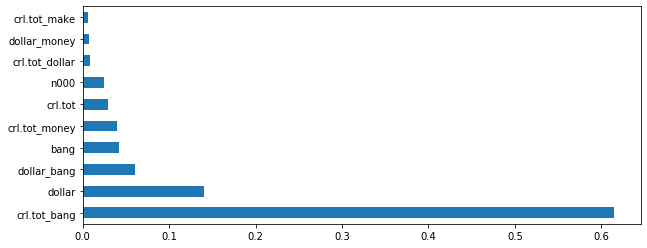

In [16]:
# в RandomForestRegressor есть возможность вывести самые важные 
# признаки для модели
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 4)
importances = pd.Series(grb_clf.feature_importances_, index=X.columns)
importances_top10 = importances.nlargest(10)
importances_top10.plot(kind='barh')
print(f"Третий по важности признак := {importances_top10.index[2]}")

<BarContainer object of 10 artists>

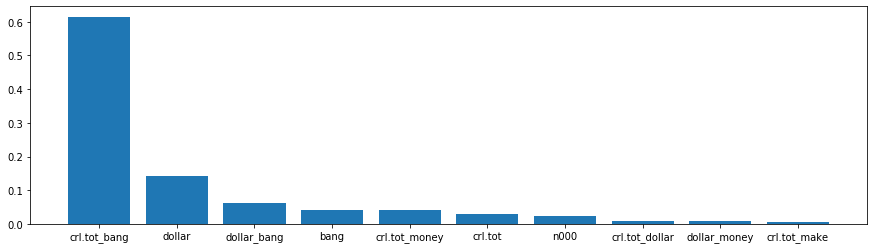

In [17]:
plt.rcParams['figure.figsize'] = (15, 4)
plt.bar(height=importances_top10.values, x=importances_top10.index)

#### Задача 6.4.4

Теперь перейдем к подбору параметров в модели. Для этого в библиотеке scikit-learn есть метод GridSearchCV. Ему на вход подается модель, список параметров и способ оценивания. При запуске метода fit модель обучается со всеми возможными комбинациями параметров, лучшей комбинацией параметров становятся та, при которой значение метрики максимально.

Укажите в качестве estimator градиетный бустинг с параметрами по дефолту и random_state=42. В параметре scoring укажите 'accuracy', n_jobs=-1, cv=5.
Сетку параметров задайте такой:  
```python
param_grid = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],  
              'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]} 
``` 

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {'learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500, 1750]}

In [20]:
model = GradientBoostingClassifier(random_state=RANDOM_SEED)

grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, 
                       scoring='accuracy', n_jobs=-1, cv=5)

In [21]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750]},
             scoring='accuracy')

Посмотрим на гиперпараметры, которые мы получили и на точность при лучших параметрах

In [23]:
grid_cv.best_params_

{'learning_rate': 0.01, 'n_estimators': 1250}

In [24]:
print('Точность при лучших параметрах =', round(grid_cv.best_score_, 3))

Точность при лучших параметрах = 0.884


### Задача 6.4.5

При использовании GridSearchCV перебираются все возможные способы комбинации параметров. Сколько разных моделей (моделей градиентного бустинга с разными наборами параметров) обучилось в прошлом задании?

In [25]:
count_model = 1
for key in param_grid.keys():
    count_model *= len(param_grid[key])
print(f'Всего обучалось {count_model} модеей')

Всего обучалось 48 модеей


### Задача 6.4.6

Теперь воспользуемся GridSearchCV для подбора максимальной глубины (max_depth). В качестве estimator используйте градиентный бустинг с раннеее подобранными параметрами и random_state=42. Переберите все значения max_depth от 5 до 15 включительно. В ответ запишите значение параметра, при котором точность максимальна.

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(5,15)}

model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1250, 
                                   random_state=RANDOM_SEED)

grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, 
                       scoring='accuracy', n_jobs=-1, cv=5)

In [27]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  n_estimators=1250,
                                                  random_state=42),
             n_jobs=-1, param_grid={'max_depth': range(5, 15)},
             scoring='accuracy')

Посмотрим на гиперпараметры, которые мы получили и на точность при лучших параметрах

In [28]:
accur = round(grid_cv.best_score_, 3)
best_param = grid_cv.best_params_['max_depth']
print(f'Максимальная точность: {accur} при значении max_depth = {best_param}')

Максимальная точность: 0.885 при значении max_depth = 5


### Задание 6.4.7

Может показаться, что, научившись запускать готовые фукнции из библиотек и настривать параметры, мы абсолютно готовы к работе. Однако на поле боя нас могут подстерегать еще опасности — *legacy code*, то есть код, написанный кем-то до вас. Может быть, его можно было бы и улучшить, но на нём уже столько всего надстроено, что переписывать всё практически невозможно.

А ещё часто будет возникать необходимость просто понять код коллеги или сделать *code review* (грубо говоря, это анализ кода на предмет ошибок и расхождения в стиле). Во всех этих ситуациях необходим навык быcтрого чтения кода.

Поэтому в качестве примера в этом задании мы предлагаем изучить код для реализации *AdaBoost* с нуля. Вам необходимо запустить эту функцию, но с дописанными строчками (вычисление ошибки и веса алгоритма) на всех признаках, получившихся после всех преобразований в предыдущем датасете (до разделения выборки на обучающую и тестовую). Параметр *learning_rate* возьмите равным 0.001, М = 10. В ответ запишите точность, округленную до трёх знаков после точки-разделителя.

In [45]:
def AdaBoost_scratch(X, y, M=10, learning_rate = 1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]

    # инициализация весов
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    # цикл по длине М
    for m in range(M):   

        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        # Маска для ошибок классификации
        incorrect = (y_predict != y)

        # Оцениваем ошибку
        estimator_error = np.sum(sample_weight*incorrect) / sample_weight.sum()
    
        # Вычисляем вес нового алгоритма
        estimator_weight =  learning_rate * np.log((1 - estimator_error) / estimator_error)
        
        # Получаем новые веса объектов
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))

        # Сохраяем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        


    # Для удобства переведем в numpy.array   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list

In [46]:
from sklearn.tree import DecisionTreeClassifier
estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X, y, M=10, 
                                                                              learning_rate=0.001)

Accuracy =  0.8228645946533363


## 6.6. Стекинг. Практика
---
Разберём стекинг на практике, проанализировав датасет, описывающий параметры, которые были сняты со спутника при фотографировании Земли. 

Подгружаем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.base import clone

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Загружаем данные
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz', sep=',', header=None)[:10000]

In [3]:
# Отобразим первые 3 строки
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2


In [4]:
# посмотрим размеры DataSeta
df.shape

(10000, 55)

У нас есть 54 переменные в 55 колонке указан тип поверхности, к которому относится рассматриваемый квадрат.  Для упрощения задачи будем рассматривать два типа поверхностей (тип 1 и тип 2) — так мы сводим нашу задачу к задаче бинарной классификации. 

In [5]:
features = list(range(0, 54))
target = 54

df = df[(df[target] == 1) | (df[target] == 2)]

In [6]:
# Разобьем данные на обучающие и тестовые и выделим из нах целевой признак target (тип поверхности)
cover_train, cover_test = train_test_split(df, test_size=0.5)

cover_X_train, cover_y_train = cover_train[features], cover_train[target]
cover_X_test, cover_y_test = cover_test[features], cover_test[target]

Сделаем базовую предобработку, воспользуемся **StandardScaler**.

In [7]:
scaler = StandardScaler()
cover_X_train = scaler.fit_transform(cover_X_train)
cover_X_test = scaler.transform(cover_X_test)

**Стекинг** позволяет объединять ответы нескольких алгоритмов первого уровня в один большой ответ при помощи нового алгоритма обучения.  
**Стекинг** - еще один способ несколько алгоритмов в один, который часто используется при решении реальных задач из промышленной сферы, так и в конкурсах на платформе вроде Kaggle.
Подход использует понятие _базовых классификаторов_, каждый из которых независимо обучается на некотором (возможно одном и том же) множестве признаков, а также _мета-классификатора_, использующего предсказания базовых классификаторов как признаки.

Для избежания переобучения будем разбивать обучающую выбоку на фолды — разбиение обучающей выборки на несколько частей. Например, фолды при разбиении на три части:

==*     =*=      *==

Это требуется для того, чтобы получить новые признаки (ответы алгоритмов на первом уровне) на всей обучающей выборке, т.е. ответы алгоритма на тех объектах, которые не были использованы во время обучения. В примере выше мы будем использовать ответы алгоритма, полученные на объектах звездочках.

**Важно**: на каждом фолде мы обучаем алгоритм заново.

Создадим функцию *compute_meta_feature*, которая берет некотрый алгоритм машинного обучения *clf*, обучающую выборку с параметрами *X_train* и *y_train*, отложенную выборку *X_test* и параметр кросс-валидации *cv*. 

В функции функцией zeros_like() создаем новый массив из нулей с формой и типом как у *y_train*, далее
берем объект *cv*, который выполняет процедуру разбиения на фолды, и с помощьъ цикла *for* производим по нему итерации. В каждом элементе цикла *for* будут индексы, которые относятся к тем объектам обучающей выборки, на которых мы будем проводить обучение (*train_fold_index*) и индексы объектов, на которых будем проводить тестирование (*predict_fold_index*).

Далее в цикле формируем fold-ы *X_fold_train* и *X_fold_predict*, которые относятся к сформированным индексам. Также запоминаем значения *y_fold_train*. Кроме того, в цикле делаем копию исходного алгоритма машинного обучения (clone(clf)), который передали в функцию, для того чтобы каждый раз заново обучать алгоритм. Выполняем обучение функцией fit(). 

После того, как получили обученный алгоритм, записываем его ответы на тестовом fold-е *X_fold_predict* в массив *X_meta_train*, который предварительно выделили.

Поскольку в fold-ах каждый раз будут разные объекты, постепенно заполнится *X_meta_train*. 
Затем обучаем алгоритм на **всей** обучающей выборке и запускаем его на объеках отложенной выборки, получим новые признаки  *X_meta_test*. 

Т.о. функция *compute_meta_feature* берет один алгоритм *clf* и получает с использованием некоторого разбиения какие-то новые признаки на тех объектах, кототрые не были использованы в процессе обучения.

In [8]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    """
    Эта функция подсчитывает признаки для мета-классификатора. 
    Они являются вероятностями классов при решении задачи многоклассовой классификации.

    :arg clf: классификатор
    :args X_train, y_train: обучающая выборка
    :arg X_test: признаки тестовой выборки
    :arg cv: класс, генерирующий фолды (KFold)

    :returns X_meta_train, X_meta_test: новые признаки для обучающей и тестовой выборок
    """
    X_meta_train = np.zeros_like(y_train, dtype=np.float32)  
    for train_fold_index, predict_fold_index in cv.split(X_train):
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)[:, 1]
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = meta_clf.predict_proba(X_test)[:, 1]
    
    return X_meta_train, X_meta_test

Функцию *generate_metafeatures* делает по сути тоже самое, что и *compute_meta_feature*, только она берет список из нескольких классификаторов и повторяет в цикле процедуру *compute_meta_feature*, а затем генерирует матрицу, в которой число признаков будет равно количеству классификаторов. Каждый признак - ответ классификатора, полученный методом *compute_meta_feature*.

In [9]:
def generate_metafeatures(classifiers, X_train, X_test, y_train, cv):
    """
    Создает мета-функции, используя список классификаторов.
    
     : arg classifiers: список классификаторов scikit-learn
     : args X_train, y_train: обучающий набор
     : arg X_test: набор для тестирования
     : arg cv: параметр для перекрестной проверки 
    """
    features = [ 
        compute_meta_feature(clf, X_train, X_test, y_train, cv)
        for clf in tqdm(classifiers)
    ]
    
    stacked_features_train = np.vstack([
        features_train for features_train, features_test in features
    ]).T

    stacked_features_test = np.vstack([
        features_test for features_train, features_test in features
    ]).T
    
    return stacked_features_train, stacked_features_test

#### Используем градиентный бустинг
Обучим один градиентный бустинг, в котором будем использовать 300 алгоритмов. Посмотрим на значение *accuracy*. 

In [10]:
np.random.seed(42)
clf = GradientBoostingClassifier(n_estimators=300)
clf.fit(cover_X_train, cover_y_train)

accuracy_score(clf.predict(cover_X_test), cover_y_test)

0.7815362931642001

##### Используем стекинг
Если мы будем агрегировать бустинг со случайным лесом и с двумя логистическими регрессиями, то получим результат лучше.

Здесь мы используем функцию *generate_metafeatures* с 4-я алгоритмами, она проводит процедуру *compute_meta_feature* для каждого из отдельных алгоритмов и возвращает два новых набора признаков, которые соединяем с исходными признаками, которые были до этого в обучающей выборке. Затем поверх новых признаков обучаем логистическую регрессию (без особого тюнинга, даже без использования регуляризаторов) и получаем качество выше, чем один бустинг сам по себе.



In [15]:
cv = KFold(n_splits=10, shuffle=True)

stacked_features_train, stacked_features_test = generate_metafeatures([
    LogisticRegression(C=0.001, penalty='l1', solver='liblinear', max_iter=5000),
    LogisticRegression(C=0.001, penalty='l2', solver='liblinear', max_iter=5000),  
    RandomForestClassifier(n_estimators=300, n_jobs=-1),
    GradientBoostingClassifier(n_estimators=300)
], cover_X_train, cover_X_test, cover_y_train.values, cv)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:40<00:00, 10.23s/it]


In [16]:
total_features_train = np.hstack([cover_X_train, stacked_features_train])
total_features_test = np.hstack([cover_X_test, stacked_features_test])

In [17]:
np.random.seed(42)
clf = LogisticRegression(penalty='none', solver='lbfgs')
clf.fit(stacked_features_train, cover_y_train)
accuracy_score(clf.predict(stacked_features_test), cover_y_test)

0.7970401691331924

## Задание 6.6.1 - Задание 6.6.12
---
Все задания выполняются на основе датасета: load_digits()

In [5]:
import pandas as pd
import numpy as np

from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier,
                              RandomForestClassifier, ExtraTreesClassifier)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.datasets import load_digits

from tqdm import tqdm

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats.distributions import randint

In [2]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, 
                                                    test_size=0.2)

### Задание 6.6.1

Выше мы разобрали схему генерации признаков в стекинге, когда для тестовой выборки алгоритм заново переобучался на всей тренировочной выборке. Реализуйте схему, когда вместо этого производится агрегация ответов всех обученных на фолдах классификаторов на тестовой выборке при помощи усреднения.

Логика решения:

1) Создадим *X_meta_test*, заполним его нулями (по аналогии с *X_meta_train*);

2) Далее на каждом шаге, где мы обучаем *folded_clf.fit* (*X_fold_train*, *y_fold_train*) и его предсказания на *X_fold_predict* запихиваем в *X_meta_train[predict_fold_index]* добавим еще одну строку, где в *X_meta_test* будем добавлять предсказания вероятностей *folded_clf* на *X_test*. Их можно сразу складывать друг с другом или сохранить много массивов, тогда в конце их нужно будет все сложить, а потом делить на количество сплитов (количество массивов равно количеству сплитов в кросс - валидации);

3) После цикла останется только усреднить все эти массивы, это и будет наш *X_meta_test*.

In [22]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    """ 
    Эта функция подсчитывает признаки для мета-классификатора. 
    Они являются вероятностями классов при решении задачи многоклассовой классификации.

    :arg clf: классификатор
    :args X_train, y_train: обучающая выборка
    :arg X_test: признаки тестовой выборки
    :arg cv: класс, генерирующий фолды (KFold)

    :returns X_meta_train, X_meta_test: новые признаки для обучающей и тестовой выборок
    """
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(X_train), n_classes), dtype=np.float32)
    X_meta_test = np.zeros((len(X_test), n_classes), dtype=np.float32)
    for train_fold_index, predict_fold_index in cv.split(X_train):
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]

        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)

        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
        X_meta_test += folded_clf.predict_proba(X_test)


    X_meta_test = X_meta_test / cv.n_splits
    return X_meta_train, X_meta_test

Для следующих заданий используйте этот код:

In [8]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(y_train), n_classes), dtype=np.float32)

    splits = cv.split(X_train)
    for train_fold_index, predict_fold_index in splits:
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = meta_clf.predict_proba(X_test)
    
    return X_meta_train, X_meta_test


def generate_meta_features(classifiers, X_train, X_test, y_train, cv):
   
    features = [
        compute_meta_feature(clf, X_train, X_test, y_train, cv)
        for clf in tqdm(classifiers)
    ]
    
    stacked_features_train = np.hstack([
        features_train for features_train, features_test in features
    ])

    stacked_features_test = np.hstack([
        features_test for features_train, features_test in features
    ])
    
    return stacked_features_train, stacked_features_test

cv = KFold(n_splits=10, shuffle=True, random_state=42)


def compute_metric(clf, X_train=X_train, y_train=y_train, X_test=X_test):
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    return np.round(f1_score(y_test, y_test_pred, average='macro'), 6)


**ПОДСКАЗКА**
* Во всех случаях, когда модель принимает random_state — обязательно указывайте его равным 42
* На разных версиях sklearn ответы могут отличаться
* В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания.

### Задание 6.6.2

Используйте функцию **generate_meta_features** для стекинга следующих алгоритмов:

* логистическая регрессия с L1-регуляризацией, C=0.001, солвер — 'saga', схема работы мультиклассовой классификации — one-vs-rest, максимальное допустимое количество итераций — 2000

* логистическая регрессия с L2-регуляризацией, C=0.001, солвер — 'saga', схема работы мультиклассовой классификации — multinomial, максимальное допустимое количество итераций — 2000

* случайный лес из 300 деревьев

* градиентный бустинг из 200 деревьев

Как мета-алгоритм используйте логистическую регрессию без регуляризации со схемой работы мультиклассовой классификации — auto и солвером 'lbfgs'.
Посчитайте качество при помощи передачи новых признаков в функцию compute_metric.

In [6]:
# Сделаем базовую предобработку, воспользуемся StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
stacked_features_train, stacked_features_test = generate_meta_features([
    LogisticRegression(C=0.001, penalty='l1', solver='saga', multi_class='ovr', 
                       max_iter=2000, random_state=42),
    LogisticRegression(C=0.001, penalty='l2', solver='saga', multi_class='multinomial', 
                       max_iter=2000, random_state=42),  
    RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42),
    GradientBoostingClassifier(n_estimators=200, random_state=42)
], X_train, X_test, y_train, cv)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:29<00:00, 37.31s/it]


In [10]:
clf = LogisticRegression(penalty='none', solver='lbfgs', multi_class='auto', random_state=42)
compute_metric(clf, X_train=stacked_features_train, y_train=y_train, X_test=stacked_features_test)

0.981915

### Задание 6.6.3

Используйте функцию **generate_meta_features** для стекинга следующих алгоритмов:
* случайный лес из 300 деревьев
* случайный лес из 200 экстремальных деревьев

Как мета-алгоритм используйте логистическую регрессию без регуляризации со схемой работы мультиклассовой классификации — auto и солвером 'lbfgs'.
Посчитайте качество при помощи передачи новых признаков в функцию compute_metric.

In [11]:
stacked_features_train, stacked_features_test = generate_meta_features([ 
    RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42),
    ExtraTreesClassifier(n_estimators=200, random_state=42)
], X_train, X_test, y_train, cv)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:27<00:00, 13.52s/it]


In [12]:
clf = LogisticRegression(penalty='none', solver='lbfgs', multi_class='auto', random_state=42)
compute_metric(clf, X_train=stacked_features_train, y_train=y_train, X_test=stacked_features_test)

0.98449

### Задание 6.6.4

Используйте функцию **generate_meta_features** для стекинга следующих алгоритмов:
* метод ближайшего соседа (k-NN) со стандартными параметрами
* случайный лес из 300 экстремальных деревьев

Как мета-алгоритм используйте логистическую регрессию без регуляризации со схемой работы мультиклассовой классификации — auto и солвером 'lbfgs'.
Посчитайте качество при помощи передачи новых признаков в функцию compute_metric.

In [27]:
# вернем ненормализованные признаки (с нормализованными ответ не сходится)
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Стекинг
stacked_features_train, stacked_features_test = generate_meta_features([ 
    KNeighborsClassifier(),
    ExtraTreesClassifier(n_estimators=300, n_jobs=-1, random_state=42)
], X_train, X_test, y_train, cv)

clf = LogisticRegression(penalty='none', solver='lbfgs', multi_class='auto', n_jobs=-1, 
                         random_state=42)
compute_metric(clf, X_train=stacked_features_train, y_train=y_train, X_test=stacked_features_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:15<00:00,  7.99s/it]


0.989904

In [25]:
# проверить версию sklearn
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.1.


### Задание 6.6.5

Используйте функцию **generate_meta_features** для стекинга следующих алгоритмов:

* логистическая регрессия с L1-регуляризацией, C=0.001, солвер — 'saga', схема работы мультиклассовой классификации — one-vs-rest, максимальное допустимоей количество итераций — 2000

* метод ближайшего соседа со стандартными параметрами

* случайный лес из 300 экстремальных деревьев

* AdaBoost со стандартными параметрами

Как мета-алгоритм используйте логистическую регрессию без регуляризации со схемой работы мультиклассовой классификации — auto и солвером 'lbfgs'.
Посчитайте качество при помощи передачи новых признаков в функцию compute_metric.

In [28]:
# вернем ненормализованные признаки (с нормализованными ответ не сходится)
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

stacked_features_train, stacked_features_test = generate_meta_features([ 
    LogisticRegression(C=0.001, penalty='l1', solver='saga', multi_class='ovr', 
                       max_iter=2000, random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42),
    AdaBoostClassifier(random_state=42)
], X_train, X_test, y_train, cv)

clf = LogisticRegression(penalty='none', solver='lbfgs', multi_class='auto', n_jobs=-1, 
                         random_state=42)
compute_metric(clf, X_train=stacked_features_train, y_train=y_train, X_test=stacked_features_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:57<00:00, 29.39s/it]


0.983693

### Задание 6.6.6 - 6.6.7

Используйте функцию **generate_meta_features** для стекинга следующих алгоритмов:

* случайный лес из 300 деревьев

* случайный лес из 300 экстремальных деревьев

Для генерации фолдов используйте класс StratifiedKFold, который позволяет делать так называемые стратифицированные разбиения (в каждом фолде будет одинаковое соотношение классов). Для корректной работы необходимо подправить код в функции compute_meta_feature. 

Как мета-алгоритм используйте логистическую регрессию без регуляризации со схемой работы мультиклассовой классификации — auto и солвером 'lbfgs'.
Посчитайте качество при помощи передачи новых признаков в функцию compute_metric. Количество фолдов = 10

In [31]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(y_train), n_classes), dtype=np.float32)

    splits = cv.split(X_train, y_train) # изменение: надо передать метки классов 
    for train_fold_index, predict_fold_index in splits:
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = meta_clf.predict_proba(X_test)
    return X_meta_train, X_meta_test

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42) # 6.6.7

stacked_features_train, stacked_features_test = generate_meta_features([ 
    RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42),
    ExtraTreesClassifier(n_estimators=300, n_jobs=-1, random_state=42)
], X_train, X_test, y_train, cv)

clf = LogisticRegression(penalty='none', solver='lbfgs', multi_class='auto', n_jobs=-1,
                         random_state=42)
compute_metric(clf, X_train=stacked_features_train, y_train=y_train, X_test=stacked_features_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:33<00:00, 16.69s/it]


0.983918

### Задание 6.6.8
В предыдущей задаче укажите количество фолдов равным 5 и поменяйте мета-алгоритм на случайный лес со стандартными параметрами. Укажите полученное качество.

In [32]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

stacked_features_train, stacked_features_test = generate_meta_features([ 
    RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42),
    ExtraTreesClassifier(n_estimators=300, n_jobs=-1, random_state=42)
], X_train, X_test, y_train, cv)

clf = RandomForestClassifier(n_jobs=-1, random_state=42)
compute_metric(clf, X_train=stacked_features_train, y_train=y_train, X_test=stacked_features_test)


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:11<00:00,  5.86s/it]


0.981661

### Задание 6.6.9
В предыдущей задаче поменяйте мета-алгоритм на метод ближайших соседей (k-NN) со стандартными параметрами. Укажите полученное качество.

In [33]:
clf = KNeighborsClassifier(n_jobs=-1)
compute_metric(clf, X_train=stacked_features_train, y_train=y_train, X_test=stacked_features_test)

0.98417

### Задание 6.6.10
В предыдущей задаче поменяйте мета-алгоритм на градиентный бустинг со стандартными параметрами. Укажите полученное качество.

In [35]:
clf = GradientBoostingClassifier(random_state=42)
compute_metric(clf, X_train=stacked_features_train, y_train=y_train, X_test=stacked_features_test)


0.984925

### Задание 6.6.11
Используйте функцию **generate_meta_features** для стекинга следующих алгоритмов:

* случайный лес из 300 деревьев, критерий Джини, максимальная глубина — 24

* случайный лес из 300 экстремальных деревьев

Для генерации фолдов используйте класс StratifiedKFold, который позволяет делать так называемые стратифицированные разбиения (в каждом фолде будет одинаковое соотношение классов).

Для генерации фолдов используйте класс StratifiedKFold и поправленный Вами ранее код в функции compute_meta_feature.
Выполните разбиение на 3 фолда.

Как мета-алгортм используйте случайный лес из 100 экстремальных деревьев. Посчитайте качество при помощи передачи новых признаков в функцию compute_metric.

In [36]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

stacked_features_train, stacked_features_test = generate_meta_features([ 
    RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=24, n_jobs=-1, random_state=42),
    ExtraTreesClassifier(n_estimators=300, n_jobs=-1, random_state=42)
], X_train, X_test, y_train, cv)

clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
compute_metric(clf, X_train=stacked_features_train, y_train=y_train, X_test=stacked_features_test)


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  3.00s/it]


0.983967

### Задание 6.6.12
Обучите на тренировочной выборке следующие алгоритмы:

* случайный лес из 300 деревьев, критерий Джини, максимальная глубина — 24

* случайный лес из 300 экстремальных деревьев

*  логистическую регрессию со стандартными параметрами

Усредните их ответы на тестовой выборке и посчитайте качество аналогично функции compute_metric (F1-score с макро-усреднением, округленный до 6 знака).

In [41]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, 
                                                    test_size=0.2)

def compute_predicts(classifiers, X_train, y_train, X_test):
    predicts = [] 
    for clf in tqdm(classifiers):
        clf.fit(X_train, y_train)
        predicts.append(clf.predict(X_test))
    return predicts
        
predicts = compute_predicts([ 
    RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=24, n_jobs=-1, 
                           random_state=42),
    ExtraTreesClassifier(n_estimators=300, n_jobs=-1, random_state=42),
    LogisticRegression(random_state=42)
], X_train, y_train, X_test)
    
# print(predicts)

y_test_pred = np.mean(predicts, axis=0, dtype='int')
# print(y_test_pred)
np.round(f1_score(y_test, y_test_pred, average='macro'), 6)

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:02<00:01,  1.44s/it]C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.04s/it]


0.965569